## 5.3 Using a pre-trained convnet

Consider VGG-16 (convnet architecture developed in 2014) made for ImageNet dataset

There are two ways to use a pretrained network: 1- feature extraction 2- fine-tuning

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pwd
!unzip "drive/My Drive/Colab Notebooks/dogs-vs-cats.zip"
# It unzips the data in root drive

/content
Archive:  drive/My Drive/Colab Notebooks/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [0]:
!unzip train.zip
# After the following two line source_data/train would have train folder data
!mkdir source_data
!mv train source_data

#!rm -Rf cats_and_dogs_small

In [0]:
import os, shutil

def createIfNot(pathName):
    if os.path.exists(pathName):
        print(pathName, " Already Exists")
    else:
        os.mkdir(pathName)


base_dir = 'cats_and_dogs_small'
createIfNot(base_dir)
train_dir = os.path.join(base_dir, 'train')
createIfNot(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
createIfNot(validation_dir)
test_dir = os.path.join(base_dir, 'test')
createIfNot(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
createIfNot(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
createIfNot(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
createIfNot(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
createIfNot(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
createIfNot(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
createIfNot(test_dogs_dir)

In [0]:
original_dataset_dir = 'source_data/train'


#getting 1000 cats pictures for training
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
#!ls cats_and_dogs_small/train/cats

#getting 500 cats pictures for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 cats pictures for testing
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#getting 1000 dogs pics for training
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 dogs pics for testing
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

##getting 500 dogs pics for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
!mv cats_and_dogs_small "/content/drive/My Drive/Colab Notebooks/"

# Congratulations: 
# Finally we've saved our small data in my drive, now it will never loss
# but the base directory is changed now: 
# base_dir = 'drive/My Drive/Colab Notebooks/cats_and_dogs_small'

### 1- Feature Extraction

In [0]:
# Listing 5.16 - Instantiating the VGG16 convolutional base

from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top=False, input_shape=(150,150,3))

# weights: specifies the weight checkpoint from which to initialize the model
# time taken = same as blink of eyes

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
conv_base.summary()


# Observation: There are a total of 5 blocks. Block 1 and 2 have 2,2 conv2d layers,
# Block 3 till block 5 have 3,3 conv2d layers.

# Summary of output shape after each block:
# - 150,150,3 (input of convolutional base)
# - 75,75,64
# - 37,37,128
# - 18,18,256
# - 9,9,256
# - 4,4,512   (output of convolutional base)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Two ways to proceed:
1- fast feature extraction without data augmentation
2- feature extraction with data augmentation

#### Fast feature extraction without data augmentation 

In [0]:
# Listing 5.17 - Extracting features using the pretrained convolutional base

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'drive/My Drive/Colab Notebooks/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)
# batch size is equal to 20

def extract_features(directory, sample_count):
  features = np.zeros((sample_count,4,4,512))
  labels = np.zeros((sample_count))            # excluding syntax: shape

  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = 20,
      class_mode = 'binary')
  
  i=0
  for inputs_batch, labels_batch in generator:      # i want to check what is the datatype of both batches
    features_batch = conv_base.predict(inputs_batch)
    features[i*20 : (i+1)*20] = features_batch
    labels[i*20 : (i+1)*20] = labels_batch
    i+=1           
    if i*20 >= sample_count:
      break                # for train data 100 is the range of i
  return features, labels
  

In [0]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)
# Flattening:
train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

#time taken = around 10s

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# Listing 5.18 - Defining and training the densely connected classifier

from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))  # why dropout in between here?
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics = ['acc'])
history = model.fit(train_features, train_labels,    # both are numpy arrays
                    epochs = 30,
                    batch_size = 20,
                    validation_data = (validation_features, validation_labels))

# This fit doesn't needs steps_per_epoch and validation_steps
# Seems like steps_per_epoch is 2000 here. But not sure.

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 519us/step - loss: 0.6804 - acc: 0.6075 - val_loss: 0.4755 - val_acc: 0.8150
Epoch 2/30
2000/2000 [==============================] - 1s 371us/step - loss: 0.4514 - acc: 0.7910 - val_loss: 0.3792 - val_acc: 0.8600
Epoch 3/30
2000/2000 [==============================] - 1s 368us/step - loss: 0.3725 - acc: 0.8355 - val_loss: 0.3447 - val_acc: 0.8530
Epoch 4/30
2000/2000 [==============================] - 1s 366us/step - loss: 0.3183 - acc: 0.8645 - val_loss: 0.3100 - val_acc: 0.8820
Epoch 5/30
2000/2000 [==============================] - 1s 362us/step - loss: 0.2905 - acc: 0.8810 - val_loss: 0.2996 - val_acc: 0.8750
Epoch 6/30
2000/2000 [==============================] - 1s 376us/step - loss: 0.2698 - acc: 0.8940 - val_loss: 0.2750 - val_acc: 0.9000
Epoch 7/30
2000/2000 [==============================] - 1s 364us/step - loss: 0.2456 - acc: 0.9040 - val_loss: 0.2741 - val_acc: 0.8930


Validation accuracy = 90%

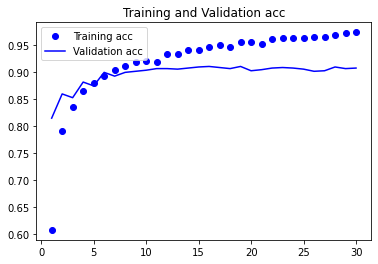

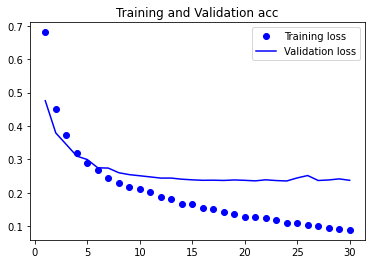

In [0]:
# Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure() # for second plot
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation acc')  # future work: change it to loss
plt.legend()

plt.show()

In [0]:
# Nice graph!
# Me: It tells that we do not need more epochs, and it is overfitting from the start

But the plots also indicate
that you’re overfitting almost from the start—despite using dropout with a fairly large
rate.

 That’s because this technique doesn’t use data augmentation, which is essential
for preventing overfitting with small image datasets.

#### Feature extraction with data augmentation

In [0]:
# Listing 5.20 Adding a densely connected classifier on top of the convolutional base

from keras import models, layers, optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))     #not using dropout after this layer
model.add(layers.Dense(1, activation = 'sigmoid'))  

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [0]:
# conv_base.trainable = False, and  No. of weight tensors
print('This is the number of trainable weights '
'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [0]:
# Copied from one of the previous cells:
import os
base_dir = 'drive/My Drive/Colab Notebooks/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
# Listing 5.21 - Training the model end to end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])

history = model.fit(train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 1460s 15s/step - loss: 0.6062 - acc: 0.6755 - val_loss: 0.4416 - val_acc: 0.8200
Epoch 2/30
100/100 [==============================] - 20s 203ms/step - loss: 0.4899 - acc: 0.7835 - val_loss: 0.3951 - val_acc: 0.8620
Epoch 3/30
100/100 [==============================] - 20s 200ms/step - loss: 0.4400 - acc: 0.8115 - val_loss: 0.3319 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 20s 202ms/step - loss: 0.4057 - acc: 0.8255 - val_loss: 0.2466 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 20s 203ms/step - loss: 0.3929 - acc: 0.8170 - val_loss: 0.2071 - val_acc: 0.8870
Epoch 6/30
100/100 [==============================] - 20s 197ms/step - loss: 0.3750 - acc: 0.8395 - val_loss: 0.3906 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 20s 197ms/step - loss: 0.3595 - acc: 0.8445 - val_lo

In [0]:
# Use GPU only.

# Observation on fit:
# time taken = 35mins (25mins by first epoch and 20s,20s by other epochs)
# Each epoch shows the current status out of 100 while training.

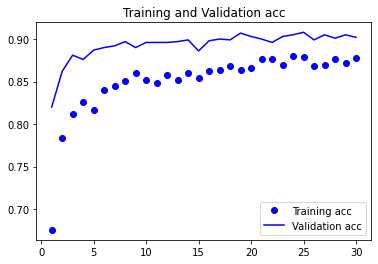

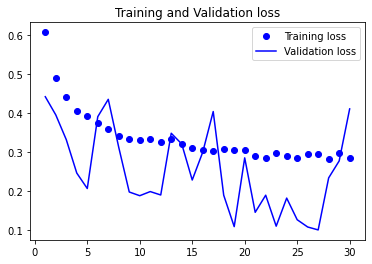

In [0]:
# Plotting the results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure() # for second plot
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [0]:
# Saving:

In [0]:
model.save('cats_and_dogs_small_4.h5')

In [0]:
import pickle

modelStoragePath = ''
def saveData(model, history, iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model.save(modelFile)
    #saving history file too
    with open(historyFile, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    return modelFile, historyFile

import tensorflow.keras.models
def loadData(iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model = models.load_model(modelFile)
    with open(historyFile, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return model, history

In [0]:
modelFile, historyFile = saveData(model, history, iteration = 41)
print(modelFile, historyFile, " Saved")

model_cats_dogs_small41.h5 History_cats_and_dogs_small41.pkle  Saved


In [0]:
# Congrats: Saving successful
# Single line command and sir's huge function results in a model of equal size

In [0]:
# Rough
# I remember that I have disabled auto filling in settings